# Iris Data Set Analysis
This notebook contains solutions to the jupyter, pyplot and numpy [problem sheet](https://emerging-technologies.github.io/problems/jupyter.html). This problem sheet uses the famous iris data set. This data set contains data regarding three related species, or classes, of Iris flowers. There are 50 samples per class making a total of 150 samples. Each sample consists of five variables, they are the sepal length in cm, sepal width in cm, petal length in cm, petal width in cm and and the class, in that order. The three classes are Iris Setosa, Iris Versicolour and Iris Virginica. The full desciption of the data set can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names). Before starting, import any libraries that might be required.

In [13]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as plt

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (16.0, 8.0)

### Load the data
The first step is to load the iris data set from the data folder.

In [3]:
# First read in the numbers and transpose the data
data = np.genfromtxt('data/iris.csv', delimiter=',', dtype=np.float, usecols=(0, 1, 2, 3))
sl, sw, pl, pw = data.transpose()

# Then read in the labels
labels = np.genfromtxt('data/iris.csv', delimiter=',', dtype=np.str, usecols=(4))

# Output the data
sl, sw, pl, pw, labels

(array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
         4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
         4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
         5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
         5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
         5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
         5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
         6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
         5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
         5.7,  6.3,  5.8,  7.1,  6.3,  6.5,  7.6,  4.9,  7.3,  6.7,  7.2,
         6.5,  6.4,  6.8,  5.7,  5.8,  6.4,  6.5,  7.7,  7.7,  6. ,  6.9,
         5.6,  7.7,  6.3,  6.7,  7.2,  6.2,  6.1,  6.4,  7.2,  7.4,  7.9,
         6.4,  6.3,  6.1,  7.7,  6.3,  6.4,  6. ,  6.9,  6.7,  6.9,  5.8,
         6.8,  6.7,  6.7,  6.3,  6.5, 

### Plot sepal length and width
Use pyplot to create a scatter plot of sepal length on the x-axis versus sepal width on the y-axis. Add axis labels and a title to the plot.

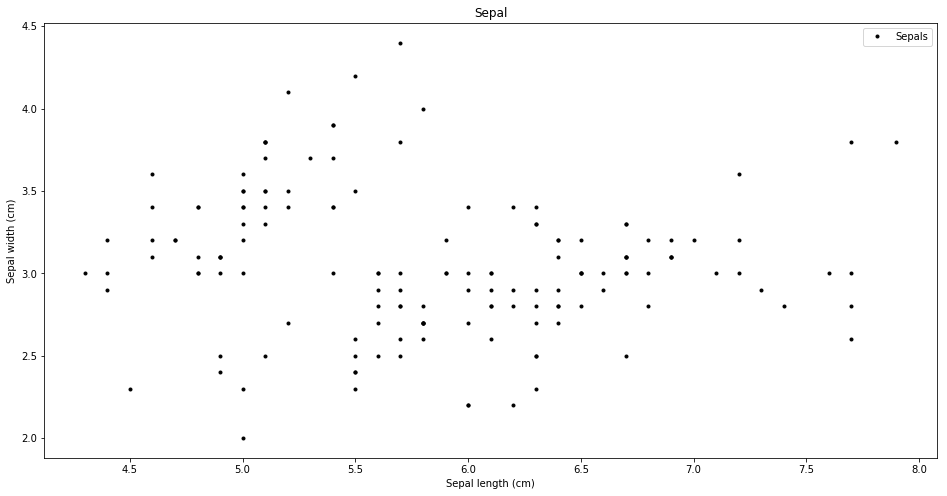

In [15]:
plt.plot(sl, sw, 'k.', label='Sepals')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.title('Plot of sepal length and width')
plt.show()